In [1]:
# general import environment
print('versions')
print ('------------')
import pandas as pd
print('pandas: ', pd.__version__)
pd.set_option('display.max_columns', None)
import numpy as np
print('numpy: ', np.__version__)
import time as time
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
print('mpl: ', mpl.__version__)
%matplotlib inline

import warnings
warnings.filterwarnings("ignore") # ignore warnings

versions
------------
pandas:  0.20.3
numpy:  1.13.3
mpl:  2.0.2


### Prophet
This notebook demonstrates time series forecasting on the same underlying Treasury curve data using 
<a target="_blank" href="https://research.fb.com/prophet-forecasting-at-scale/">Prophet</a>, an open-source project released by Facebook's data science team (available in Python & R). 
<br><br>
The project builds on <a target="_blank" href="http://mc-stan.org/">Stan</a>, a commonly used platform for doing Bayesian inference & MCMC sampling.  Prophet makes it easy to resample & deconstruct timeseries data into sub-component periods (weekly/day-of-week) and explore trends or quickly generate reasonable confidence intervals.

### load data

In [2]:
#### cache during development
temporal_group = 'weekly'
df = pd.read_csv('../data/historical_data_{0}.csv'.format(temporal_group))

## Prophet

In [3]:
# load module
from fbprophet import Prophet

In [4]:
# set target column
target_column = 'DGS30'

In [5]:
# instantitiate df object | conform to Prophet nomenclature
prophet_df = pd.DataFrame()
prophet_df['y'] = df[target_column]
prophet_df['ds'] = df['date']

In [6]:
prophet_df.sample(4)

,y,ds
536,2.63,2016-05-22
90,4.66,2007-11-04
184,4.33,2009-08-23
110,4.22,2008-03-23


In [7]:
# instantiate model object
prophet_model = Prophet(interval_width=0.95)  #default==0.8

In [8]:
# can only fit model once
prophet_model.fit(prophet_df)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
# set number of forecast steps
forecast_steps = 36

In [10]:
# Can use any valid frequency for pd.date_range, such as 'D' or 'M'
future_dates = prophet_model.make_future_dataframe(periods=forecast_steps, freq='W')
future_dates.tail(3)

,ds
644,2018-06-17
645,2018-06-24
646,2018-07-01


In [11]:
# make forecast for future dates created (pd df object)
forecast = prophet_model.predict(future_dates)

In [12]:
print(len(forecast))
forecast.tail(3)

647


,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,yearly,yearly_lower,yearly_upper,yhat
644,2018-06-17,2.579736,2.558567,2.603688,1.894190,3.438473,0.125493,0.125493,0.125493,0.125493,0.125493,0.125493,0.125493,0.125493,0.125493,2.705228
645,2018-06-24,2.577202,2.555258,2.602281,1.944997,3.469937,0.130938,0.130938,0.130938,0.130938,0.130938,0.130938,0.130938,0.130938,0.130938,2.708141
646,2018-07-01,2.574669,2.551750,2.600521,1.882225,3.459622,0.120777,0.120777,0.120777,0.120777,0.120777,0.120777,0.120777,0.120777,0.120777,2.695446


In [13]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
642,2018-06-03,2.681347,1.892306,3.455797
643,2018-06-10,2.693174,1.887887,3.475920
644,2018-06-17,2.705228,1.894190,3.438473
645,2018-06-24,2.708141,1.944997,3.469937
646,2018-07-01,2.695446,1.882225,3.459622


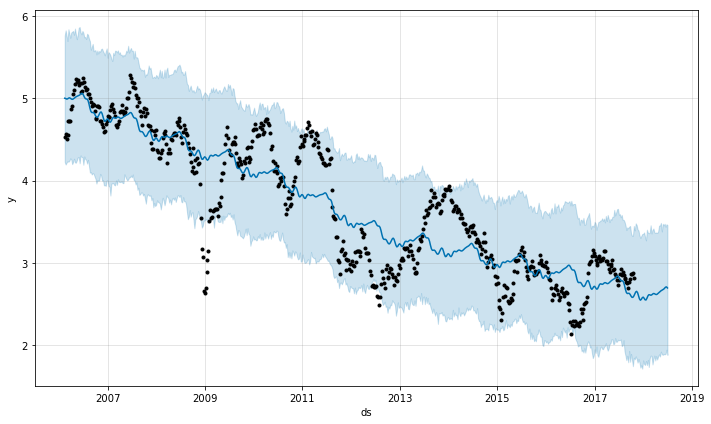

In [14]:
mpl.rc('figure', figsize=(6, 3.5))
prophet_model.plot(forecast,uncertainty=True)
plt.show;

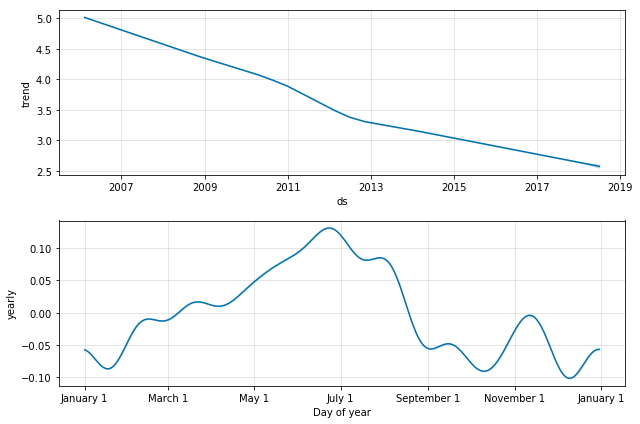

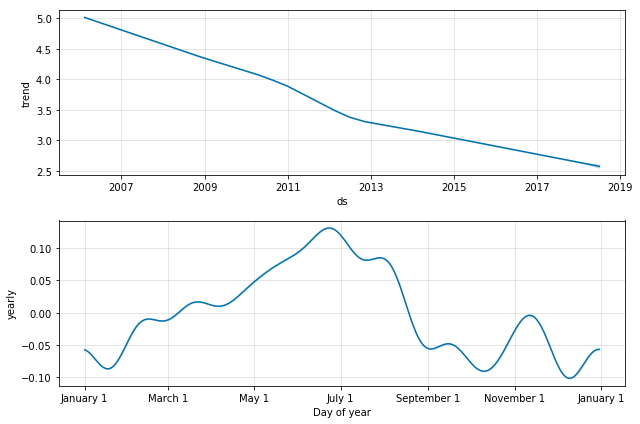

In [15]:
prophet_model.plot_components(forecast)